# Build Raw Datasets

In [71]:
import os
import json
import pathlib
import pandas as pd

from copy import deepcopy

In [72]:
data_folder = os.path.join("..", "data")
utils_folder = os.path.join("..", "utils")

raw_data_path = os.path.join(data_folder, "Raw Data")
interm_data_path = os.path.join(data_folder, "Intermediate Data")

eb_measure_path = os.path.join(raw_data_path, "EB0_EB1.xlsx")
eb0_sensor_path = os.path.join(raw_data_path, "Dades sensor online EB0")
eb1_sensor_path = os.path.join(raw_data_path, "Dades sensor online EB1")
thm_measure_path = os.path.join(raw_data_path, "THMs_ARBOÇ_2022.csv")

# EB0 - EB1 laboratory measurements

In [73]:
raw_eb0_measure_df = pd.read_excel(eb_measure_path, sheet_name="EB0")
raw_eb1_measure_df = pd.read_excel(eb_measure_path, sheet_name="EB1")

## EB0

In [74]:
raw_eb0_measure_df

,any_,FOLDERNO,data,SAMPDATE,APPRSTS,CLSAMPNO,ENVSAMPOINTID,PROFILE,DISPSTS,TESTNO,ANALYTE,RESULTASNUMERIC,units,OTHERCODE,SINONYM,SINAC_SENDED
0,2022,220000002,01/01/2022,2022-01-01 04:15:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Conductivitat,Conductivitat a 20ºC,558.00,µS/cm,278888,Conductivitat a 20ºC,Y
1,2022,220000002,01/01/2022,2022-01-01 04:15:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Mercuri,Mercuri,0.00,µg/L,278888,Mercuri,Y
2,2022,220000002,01/01/2022,2022-01-01 04:15:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,pH,pH,8.10,Und pH,278888,pH,Y
3,2022,220000002,01/01/2022,2022-01-01 04:15:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Temperatura,Temperatura,9.70,°C,278888,Temperatura,Y
4,2022,220000002,01/01/2022,2022-01-01 04:15:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Terbolesa,Terbolesa,29.30,NTU,278888,Terbolesa per nefelometria,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34743,2022,220002746,31/12/2022,2022-12-31 04:40:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Mercuri,Mercuri,0.01,µg/L,278888,Mercuri,N
34744,2022,220002746,31/12/2022,2022-12-31 04:40:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,pH,pH,8.30,Und pH,278888,pH,N
34745,2022,220002746,31/12/2022,2022-12-31 04:40:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Temperatura,Temperatura,14.20,°C,278888,Temperatura,N
34746,2022,220002746,31/12/2022,2022-12-31 04:40:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Terbolesa,Terbolesa,1.40,UNF,278888,Terbolesa per nefelometria,N


In [75]:
eb0_measure_df = raw_eb0_measure_df.copy()

eb0_measure_df["data"] = pd.to_datetime(
    eb0_measure_df["data"], format="%d/%m/%Y"
).dt.date
eb0_measure_df["SAMPDATE"] = pd.to_datetime(
    eb0_measure_df["SAMPDATE"], format="%d/%m/%Y %H:%M:%S"
).dt.time

In [76]:
eb0_measure_df

,any_,FOLDERNO,data,SAMPDATE,APPRSTS,CLSAMPNO,ENVSAMPOINTID,PROFILE,DISPSTS,TESTNO,ANALYTE,RESULTASNUMERIC,units,OTHERCODE,SINONYM,SINAC_SENDED
0,2022,220000002,2022-01-01,04:15:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Conductivitat,Conductivitat a 20ºC,558.00,µS/cm,278888,Conductivitat a 20ºC,Y
1,2022,220000002,2022-01-01,04:15:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Mercuri,Mercuri,0.00,µg/L,278888,Mercuri,Y
2,2022,220000002,2022-01-01,04:15:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,pH,pH,8.10,Und pH,278888,pH,Y
3,2022,220000002,2022-01-01,04:15:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Temperatura,Temperatura,9.70,°C,278888,Temperatura,Y
4,2022,220000002,2022-01-01,04:15:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Terbolesa,Terbolesa,29.30,NTU,278888,Terbolesa per nefelometria,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34743,2022,220002746,2022-12-31,04:40:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Mercuri,Mercuri,0.01,µg/L,278888,Mercuri,N
34744,2022,220002746,2022-12-31,04:40:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,pH,pH,8.30,Und pH,278888,pH,N
34745,2022,220002746,2022-12-31,04:40:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Temperatura,Temperatura,14.20,°C,278888,Temperatura,N
34746,2022,220002746,2022-12-31,04:40:00,Released,CAMPREDÓ,320,ADEB0v04,NaN,Terbolesa,Terbolesa,1.40,UNF,278888,Terbolesa per nefelometria,N


In [77]:
# load eb0 features and targets
with open(
    os.path.join(utils_folder, "lists", "eb0_measure_features.json"), "r"
) as f:
    eb0_measure_features = json.load(f)

with open(
    os.path.join(utils_folder, "lists", "eb0_measure_targets.json"), "r"
) as f:
    eb0_measure_targets = json.load(f)

In [78]:
# Create a new dataframe with only the features of interest, where the name of the features in the list above are in the column 'ANALYTE'
eb0_features_df = eb0_measure_df[
    eb0_measure_df["ANALYTE"].isin(eb0_measure_features)
]

eb0_features_df.drop(
    columns=[
        "any_",
        "FOLDERNO",
        "APPRSTS",
        "CLSAMPNO",
        "DISPSTS",
        "TESTNO",
        "SINONYM",
        "SINAC_SENDED",
    ],
    inplace=True,
)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_27017/2043177473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb0_features_df.drop(


In [79]:
eb0_targets_df = eb0_measure_df[
    eb0_measure_df["ANALYTE"].isin(eb0_measure_targets)
]

eb0_targets_df.drop(
    columns=[
        "any_",
        "FOLDERNO",
        "APPRSTS",
        "CLSAMPNO",
        "DISPSTS",
        "TESTNO",
        "SINONYM",
        "SINAC_SENDED",
    ],
    inplace=True,
)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_27017/2168312879.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb0_targets_df.drop(


In [80]:
eb0_features_df["RESULTASNUMERIC"] = eb0_features_df["RESULTASNUMERIC"].astype(
    float
)
eb0_targets_df["RESULTASNUMERIC"] = eb0_targets_df["RESULTASNUMERIC"].astype(
    float
)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_27017/430557617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb0_features_df["RESULTASNUMERIC"] = eb0_features_df["RESULTASNUMERIC"].astype(
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_27017/430557617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb0_targets_df["RESULTASNUMERIC"] = eb0_targets_df["RESULTASNUMERIC"].astype(


In [81]:
eb0_features_df.insert(
    loc=0,
    column="DateTime",
    value=pd.to_datetime(
        eb0_features_df["data"].astype(str)
        + " "
        + eb0_features_df["SAMPDATE"].astype(str)
    ),
)

eb0_targets_df.insert(
    loc=0,
    column="DateTime",
    value=pd.to_datetime(
        eb0_targets_df["data"].astype(str)
        + " "
        + eb0_targets_df["SAMPDATE"].astype(str)
    ),
)

In [82]:
eb0_features_df.drop(columns=["data", "SAMPDATE"], inplace=True)
eb0_targets_df.drop(columns=["data", "SAMPDATE"], inplace=True)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_27017/2970465721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb0_features_df.drop(columns=["data", "SAMPDATE"], inplace=True)
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_27017/2970465721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb0_targets_df.drop(columns=["data", "SAMPDATE"], inplace=True)


In [83]:
eb0_features_df

,DateTime,ENVSAMPOINTID,PROFILE,ANALYTE,RESULTASNUMERIC,units,OTHERCODE
0,2022-01-01 04:15:00,320,ADEB0v04,Conductivitat a 20ºC,558.00,µS/cm,278888
1,2022-01-01 04:15:00,320,ADEB0v04,Mercuri,0.00,µg/L,278888
2,2022-01-01 04:15:00,320,ADEB0v04,pH,8.10,Und pH,278888
3,2022-01-01 04:15:00,320,ADEB0v04,Temperatura,9.70,°C,278888
4,2022-01-01 04:15:00,320,ADEB0v04,Terbolesa,29.30,NTU,278888
...,...,...,...,...,...,...,...
34742,2022-12-31 04:40:00,320,ADEB0v04,Conductivitat a 20ºC,1587.00,µS/cm,278888
34743,2022-12-31 04:40:00,320,ADEB0v04,Mercuri,0.01,µg/L,278888
34744,2022-12-31 04:40:00,320,ADEB0v04,pH,8.30,Und pH,278888
34745,2022-12-31 04:40:00,320,ADEB0v04,Temperatura,14.20,°C,278888


In [84]:
eb0_targets_df

,DateTime,ENVSAMPOINTID,PROFILE,ANALYTE,RESULTASNUMERIC,units,OTHERCODE
66,2021-02-01 04:10:00,320,Default,Clorat,0.0,µg/L,278888
69,2021-02-01 04:10:00,320,Default,Clorit,0.0,µg/L,278888
353,2021-03-01 03:15:00,320,OXO,Clorat,0.0,µg/L,278888
354,2021-03-01 03:15:00,320,OXO,Clorit,0.0,µg/L,278888
434,2019-04-01 04:20:00,320,Default,Clorat,38.0,µg/L,278888
...,...,...,...,...,...,...,...
16995,2019-07-15 04:30:00,320,Default,Dibromoclorometà,0.0,µg/L,278888
21628,2019-02-18 04:00:00,320,Default,Bromodiclorometà,0.0,µg/L,278888
21629,2019-02-18 04:00:00,320,Default,Bromoform,0.0,µg/L,278888
21639,2019-02-18 04:00:00,320,Default,Cloroform,0.0,µg/L,278888


### Create DataFrame with one sample per unique DateTime

In [85]:
eb0_features_df = eb0_features_df.pivot_table(
    index=pd.Grouper(key="DateTime"),
    columns="ANALYTE",
    values="RESULTASNUMERIC",
)

In [86]:
eb0_features_df

ANALYTE,Color,Conductivitat a 20ºC,Mercuri,Quantitat més abundant de partícules,Sulfats,Temperatura,Terbolesa,pH,Índex UV
DateTime,,,,,,,,,
2018-07-17 03:00:00,NaN,NaN,NaN,23249.0,NaN,NaN,NaN,NaN,NaN
2018-08-06 12:13:00,NaN,NaN,NaN,34776.0,NaN,NaN,NaN,NaN,NaN
2018-08-20 03:20:00,NaN,NaN,NaN,27697.0,NaN,NaN,NaN,NaN,NaN
2018-09-03 04:20:00,NaN,NaN,NaN,22792.0,NaN,NaN,NaN,NaN,NaN
2018-09-10 04:30:00,NaN,NaN,NaN,NaN,175.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-01-26 04:00:00,5.3,1513.0,0.0,NaN,NaN,12.9,0.9,8.3,NaN
2023-01-27 04:00:00,5.2,1505.0,0.0,NaN,NaN,12.6,0.9,8.3,NaN
2023-01-28 04:30:00,NaN,1482.0,0.0,NaN,NaN,9.9,0.9,8.3,NaN


In [87]:
eb0_targets_df = eb0_targets_df.pivot_table(
    index=pd.Grouper(key="DateTime"),
    columns="ANALYTE",
    values="RESULTASNUMERIC",
)

In [88]:
eb0_targets_df

ANALYTE,Bromodiclorometà,Bromoform,Clorat,Clorit,Cloroform,Dibromoclorometà
DateTime,,,,,,
2018-10-01 03:30:00,NaN,NaN,0.00,0.0,NaN,NaN
2018-11-05 04:30:00,0.0,0.7,93.00,0.0,0.0,0.3
2018-12-03 04:15:00,NaN,NaN,132.00,0.0,NaN,NaN
2019-01-07 04:25:00,NaN,NaN,49.00,0.0,NaN,NaN
2019-02-04 03:00:00,NaN,NaN,65.00,0.0,NaN,NaN
2019-02-18 04:00:00,0.0,0.0,NaN,NaN,0.0,0.0
2019-03-04 04:00:00,NaN,NaN,0.00,0.0,NaN,NaN
2019-04-01 04:20:00,NaN,NaN,38.00,0.0,NaN,NaN
2019-05-06 04:45:00,NaN,NaN,72.00,0.0,NaN,NaN


In [89]:
eb0_features_df.dropna(how="all", inplace=True)
eb0_targets_df.dropna(how="all", inplace=True)

In [90]:
eb0_min_date = eb0_features_df.index.min()
eb0_max_date = eb0_features_df.index.max()

In [91]:
eb0_features_df.reset_index(inplace=True)
eb0_targets_df.reset_index(inplace=True)

In [92]:
eb0_features_df

ANALYTE,DateTime,Color,Conductivitat a 20ºC,Mercuri,Quantitat més abundant de partícules,Sulfats,Temperatura,Terbolesa,pH,Índex UV
0,2018-07-17 03:00:00,NaN,NaN,NaN,23249.0,NaN,NaN,NaN,NaN,NaN
1,2018-08-06 12:13:00,NaN,NaN,NaN,34776.0,NaN,NaN,NaN,NaN,NaN
2,2018-08-20 03:20:00,NaN,NaN,NaN,27697.0,NaN,NaN,NaN,NaN,NaN
3,2018-09-03 04:20:00,NaN,NaN,NaN,22792.0,NaN,NaN,NaN,NaN,NaN
4,2018-09-10 04:30:00,NaN,NaN,NaN,NaN,175.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1380,2023-01-26 04:00:00,5.3,1513.0,0.0,NaN,NaN,12.9,0.9,8.3,NaN
1381,2023-01-27 04:00:00,5.2,1505.0,0.0,NaN,NaN,12.6,0.9,8.3,NaN
1382,2023-01-28 04:30:00,NaN,1482.0,0.0,NaN,NaN,9.9,0.9,8.3,NaN
1383,2023-01-30 04:30:00,6.0,1435.0,0.0,NaN,NaN,9.7,1.1,8.3,NaN


In [93]:
eb0_targets_df

ANALYTE,DateTime,Bromodiclorometà,Bromoform,Clorat,Clorit,Cloroform,Dibromoclorometà
0,2018-10-01 03:30:00,NaN,NaN,0.00,0.0,NaN,NaN
1,2018-11-05 04:30:00,0.0,0.7,93.00,0.0,0.0,0.3
2,2018-12-03 04:15:00,NaN,NaN,132.00,0.0,NaN,NaN
3,2019-01-07 04:25:00,NaN,NaN,49.00,0.0,NaN,NaN
4,2019-02-04 03:00:00,NaN,NaN,65.00,0.0,NaN,NaN
5,2019-02-18 04:00:00,0.0,0.0,NaN,NaN,0.0,0.0
6,2019-03-04 04:00:00,NaN,NaN,0.00,0.0,NaN,NaN
7,2019-04-01 04:20:00,NaN,NaN,38.00,0.0,NaN,NaN
8,2019-05-06 04:45:00,NaN,NaN,72.00,0.0,NaN,NaN
9,2019-06-03 04:30:00,NaN,NaN,55.00,0.0,NaN,NaN


In [94]:
eb0_features_df.to_excel(
    os.path.join(interm_data_path, "EB0_Features_Lab.xlsx"), index=False
)

eb0_targets_df.to_excel(
    os.path.join(interm_data_path, "EB0_Targets_Lab.xlsx"), index=False
)

## EB1

In [95]:
raw_eb1_measure_df

,any_,FOLDERNO,data,SAMPDATE,APPRSTS,CLSAMPNO,ENVSAMPOINTID,PROFILE,DISPSTS,TESTNO,ANALYTE,RESULTASNUMERIC,units,OTHERCODE,SINONYM,SINAC_SENDED
0,2017,170000094,15/05/2017,2017-05-15 07:40:00,Released,SORTIDA ETAP EB1 ZA-PR,187,PRQtots,NaN,Radioisòtops,Actini-228,0.000,Bq/Kg,173219,Actini-228,Y
1,2017,170000048,15/05/2017,2017-05-15 07:40:00,Released,SORTIDA ETAP EB1 ZA-PR,187,CATPII,NaN,TAC,Alcalinitat (CaCO3) TAC,153.000,mg/L,173219,Alcalinitat (CaCO3) TAC,N
2,2017,170000048,15/05/2017,2017-05-15 07:40:00,Released,SORTIDA ETAP EB1 ZA-PR,187,CATPII,NaN,TA,Alcalinitat (TA),0.000,mg/L,173219,Alcalinitat (TA),N
3,2017,170000008,15/05/2017,2017-05-15 07:40:00,Released,SORTIDA ETAP EB1 ZA-PR,187,ACNEB1,NaN,Metalls,Alumini,41.000,µg/L,173219,Alumini,Y
4,2017,170000053,15/05/2017,2017-05-15 07:40:00,Released,SORTIDA ETAP EB1 ZA-PR,187,Default,NaN,Triazines,Ametrin,0.000,µg/L,173219,Ametrin,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70946,2023,230000238,30/01/2023,2023-01-30 08:25:00,Released,SORTIDA ETAP EB1 ZA-PR,187,Default,NaN,Triazines,Terbutilazina,0.007,µg/L,173219,Terbutilazina,N
70947,2023,230000238,30/01/2023,2023-01-30 08:25:00,Released,SORTIDA ETAP EB1 ZA-PR,187,Default,NaN,Triazines,Terbutrina,0.000,µg/L,173219,Terbutrina,N
70948,2023,230000251,30/01/2023,2023-01-30 08:25:00,Released,SORTIDA ETAP EB1 ZA-PR,187,PEST EB1-GCMS/MSv01,NaN,Semivolàtils per GC-MSMS,Trifenilfosfat,0.000,µg/L,173219,Trifenilfosfat,N
70949,2023,230000251,30/01/2023,2023-01-30 08:25:00,Released,SORTIDA ETAP EB1 ZA-PR,187,PEST EB1-GCMS/MSv01,NaN,Semivolàtils per GC-MSMS,Trifluralin,0.000,µg/L,173219,Trifluralin,N


In [96]:
eb1_measure_df = raw_eb1_measure_df.copy()

eb1_measure_df["data"] = pd.to_datetime(
    eb1_measure_df["data"], format="%d/%m/%Y"
).dt.date
eb1_measure_df["SAMPDATE"] = pd.to_datetime(
    eb1_measure_df["SAMPDATE"], format="%d/%m/%Y %H:%M:%S"
).dt.time

In [97]:
eb1_measure_df

,any_,FOLDERNO,data,SAMPDATE,APPRSTS,CLSAMPNO,ENVSAMPOINTID,PROFILE,DISPSTS,TESTNO,ANALYTE,RESULTASNUMERIC,units,OTHERCODE,SINONYM,SINAC_SENDED
0,2017,170000094,2017-05-15,07:40:00,Released,SORTIDA ETAP EB1 ZA-PR,187,PRQtots,NaN,Radioisòtops,Actini-228,0.000,Bq/Kg,173219,Actini-228,Y
1,2017,170000048,2017-05-15,07:40:00,Released,SORTIDA ETAP EB1 ZA-PR,187,CATPII,NaN,TAC,Alcalinitat (CaCO3) TAC,153.000,mg/L,173219,Alcalinitat (CaCO3) TAC,N
2,2017,170000048,2017-05-15,07:40:00,Released,SORTIDA ETAP EB1 ZA-PR,187,CATPII,NaN,TA,Alcalinitat (TA),0.000,mg/L,173219,Alcalinitat (TA),N
3,2017,170000008,2017-05-15,07:40:00,Released,SORTIDA ETAP EB1 ZA-PR,187,ACNEB1,NaN,Metalls,Alumini,41.000,µg/L,173219,Alumini,Y
4,2017,170000053,2017-05-15,07:40:00,Released,SORTIDA ETAP EB1 ZA-PR,187,Default,NaN,Triazines,Ametrin,0.000,µg/L,173219,Ametrin,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70946,2023,230000238,2023-01-30,08:25:00,Released,SORTIDA ETAP EB1 ZA-PR,187,Default,NaN,Triazines,Terbutilazina,0.007,µg/L,173219,Terbutilazina,N
70947,2023,230000238,2023-01-30,08:25:00,Released,SORTIDA ETAP EB1 ZA-PR,187,Default,NaN,Triazines,Terbutrina,0.000,µg/L,173219,Terbutrina,N
70948,2023,230000251,2023-01-30,08:25:00,Released,SORTIDA ETAP EB1 ZA-PR,187,PEST EB1-GCMS/MSv01,NaN,Semivolàtils per GC-MSMS,Trifenilfosfat,0.000,µg/L,173219,Trifenilfosfat,N
70949,2023,230000251,2023-01-30,08:25:00,Released,SORTIDA ETAP EB1 ZA-PR,187,PEST EB1-GCMS/MSv01,NaN,Semivolàtils per GC-MSMS,Trifluralin,0.000,µg/L,173219,Trifluralin,N


In [98]:
# load eb1 features and targets
with open(
    os.path.join(utils_folder, "lists", "eb1_measure_features.json"), "r"
) as f:
    eb1_measure_features = json.load(f)

with open(
    os.path.join(utils_folder, "lists", "eb1_measure_targets.json"), "r"
) as f:
    eb1_measure_targets = json.load(f)

In [99]:
eb1_features_df = eb1_measure_df[
    eb1_measure_df["ANALYTE"].isin(eb1_measure_features)
]

eb1_features_df.drop(
    columns=[
        "any_",
        "FOLDERNO",
        "APPRSTS",
        "CLSAMPNO",
        "DISPSTS",
        "TESTNO",
        "SINONYM",
        "SINAC_SENDED",
    ],
    inplace=True,
)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_27017/1978529070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb1_features_df.drop(


In [100]:
eb1_targets_df = eb1_measure_df[
    eb1_measure_df["ANALYTE"].isin(eb1_measure_targets)
]

eb1_targets_df.drop(
    columns=[
        "any_",
        "FOLDERNO",
        "APPRSTS",
        "CLSAMPNO",
        "DISPSTS",
        "TESTNO",
        "SINONYM",
        "SINAC_SENDED",
    ],
    inplace=True,
)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_27017/3436139006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb1_targets_df.drop(


In [101]:
eb1_features_df["RESULTASNUMERIC"] = eb1_features_df["RESULTASNUMERIC"].astype(
    float
)
eb1_targets_df["RESULTASNUMERIC"] = eb1_targets_df["RESULTASNUMERIC"].astype(
    float
)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_27017/1218830866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb1_features_df["RESULTASNUMERIC"] = eb1_features_df["RESULTASNUMERIC"].astype(
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_27017/1218830866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb1_targets_df["RESULTASNUMERIC"] = eb1_targets_df["RESULTASNUMERIC"].astype(


In [102]:
eb1_features_df.insert(
    loc=0,
    column="DateTime",
    value=pd.to_datetime(
        eb1_features_df["data"].astype(str)
        + " "
        + eb1_features_df["SAMPDATE"].astype(str)
    ),
)

eb1_targets_df.insert(
    loc=0,
    column="DateTime",
    value=pd.to_datetime(
        eb1_targets_df["data"].astype(str)
        + " "
        + eb1_targets_df["SAMPDATE"].astype(str)
    ),
)

In [103]:
eb1_features_df.drop(columns=["data", "SAMPDATE"], inplace=True)
eb1_targets_df.drop(columns=["data", "SAMPDATE"], inplace=True)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_27017/2941113448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb1_features_df.drop(columns=["data", "SAMPDATE"], inplace=True)
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_27017/2941113448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eb1_targets_df.drop(columns=["data", "SAMPDATE"], inplace=True)


In [104]:
eb1_features_df

,DateTime,ENVSAMPOINTID,PROFILE,ANALYTE,RESULTASNUMERIC,units,OTHERCODE
21,2017-05-15 07:40:00,187,ACNEB1,Clor lliure residual,1.20,mg/L,173219
27,2017-05-15 07:40:00,187,ACNEB1,Color,0.00,mg Pt-Co/L,173219
28,2017-05-15 07:40:00,187,ACNEB1,Conductivitat a 20ºC,852.00,µS/cm,173219
52,2017-05-15 07:40:00,187,ACNEB1,pH,7.70,Und pH,173219
72,2017-05-15 07:40:00,187,ACNEB1,Terbolesa,0.00,UNF,173219
...,...,...,...,...,...,...,...
70880,2023-01-30 08:25:00,187,ACNEB1v07,Color,0.10,mg Pt-Co/L,173219
70881,2023-01-30 08:25:00,187,ACNEB1v07,Conductivitat a 20ºC,1467.00,µS/cm,173219
70932,2023-01-30 08:25:00,187,ACNEB1v07,pH,7.70,Und pH,173219
70944,2023-01-30 08:25:00,187,ACNEB1v07,Temperatura,10.70,°C,173219


In [105]:
eb1_targets_df

,DateTime,ENVSAMPOINTID,PROFILE,ANALYTE,RESULTASNUMERIC,units,OTHERCODE
13,2017-05-15 07:40:00,187,Default,Bromodiclorometà,0.0,µg/L,173219
14,2017-05-15 07:40:00,187,Default,Bromoform,0.0,µg/L,173219
22,2017-05-15 07:40:00,187,Default,Cloroform,0.0,µg/L,173219
32,2017-05-15 07:40:00,187,Default,Dibromoclorometà,0.0,µg/L,173219
198,2017-05-22 07:15:00,187,CATPCP,àcid bromocloroacètic,1.3,µg/L,173219
...,...,...,...,...,...,...,...
70551,2023-01-16 08:35:00,187,Default,Bromoform,3.9,µg/L,173219
70557,2023-01-16 08:35:00,187,Default,Clorat,132.0,µg/L,173219
70558,2023-01-16 08:35:00,187,Default,Clorit,0.0,µg/L,173219
70559,2023-01-16 08:35:00,187,Default,Cloroform,0.0,µg/L,173219


### Create DataFrame with one sample per unique DateTime

In [106]:
eb1_features_df = eb1_features_df.pivot_table(
    index=pd.Grouper(key="DateTime"),
    columns="ANALYTE",
    values="RESULTASNUMERIC",
)

In [107]:
eb1_features_df

ANALYTE,Carboni Orgànic Total Tractament,Clor lliure residual,Color,Conductivitat a 20ºC,Quantitat més abundant de partícules,Temperatura,Terbolesa,pH,Índex UV
DateTime,,,,,,,,,
2017-05-15 07:40:00,NaN,1.20,0.0,852.0,NaN,NaN,0.00,7.7,NaN
2017-05-16 07:45:00,NaN,0.91,0.0,857.0,NaN,NaN,0.00,7.7,NaN
2017-05-17 07:30:00,NaN,1.25,0.0,866.0,NaN,NaN,0.00,7.7,NaN
2017-05-18 07:30:00,NaN,1.04,0.0,863.0,NaN,NaN,0.00,8.0,NaN
2017-05-19 07:30:00,NaN,1.36,0.0,830.0,NaN,NaN,0.20,7.6,NaN
...,...,...,...,...,...,...,...,...,...
2023-01-24 08:25:00,NaN,0.88,0.1,1552.0,NaN,9.9,0.12,7.7,NaN
2023-01-25 08:30:00,NaN,0.87,0.0,1539.0,NaN,9.9,0.12,7.9,NaN
2023-01-26 08:30:00,NaN,0.83,0.1,1528.0,NaN,10.1,0.13,7.7,NaN


In [108]:
eb1_targets_df = eb1_targets_df.pivot_table(
    index=pd.Grouper(key="DateTime"),
    columns="ANALYTE",
    values="RESULTASNUMERIC",
)

In [109]:
eb1_targets_df

ANALYTE,Bromodiclorometà,Bromoform,Clorat,Clorit,Cloroform,Dibromoclorometà,àcid bromocloroacètic,àcid dibromoacètic,àcid dicloroacètic,àcid monobromoacètic,àcid monocloroacètic
DateTime,,,,,,,,,,,
2017-05-15 07:40:00,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2017-05-22 07:15:00,0.0,2.7,0.0,0.0,0.0,4.9,1.3,1.7,0.8,0.0,0.0
2017-05-29 07:00:00,3.3,3.3,NaN,NaN,2.1,7.2,NaN,NaN,NaN,NaN,NaN
2017-06-05 07:30:00,2.2,2.5,NaN,0.0,1.7,5.3,1.3,1.7,0.7,0.0,0.0
2017-06-12 07:40:00,0.0,2.7,NaN,NaN,0.0,3.8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19 06:45:00,0.0,4.0,127.0,0.0,0.0,4.1,0.8,2.2,0.0,0.0,0.0
2022-12-27 07:00:00,0.0,5.3,NaN,NaN,0.0,5.4,NaN,NaN,NaN,NaN,NaN
2023-01-02 06:55:00,0.0,4.0,136.0,0.0,0.0,4.3,0.9,2.3,0.0,0.0,0.0


In [110]:
eb1_features_df.dropna(how="all", inplace=True)
eb1_targets_df.dropna(how="all", inplace=True)

In [111]:
eb1_min_date = eb1_features_df.index.min()
eb1_max_date = eb1_features_df.index.max()

In [112]:
eb1_features_df.reset_index(inplace=True)
eb1_targets_df.reset_index(inplace=True)

In [113]:
eb1_features_df.to_excel(
    os.path.join(interm_data_path, "EB1_Features_Lab.xlsx"), index=False
)

eb1_targets_df.to_excel(
    os.path.join(interm_data_path, "EB1_Targets_Lab.xlsx"), index=False
)

# Online Sensors Reading

In [114]:
def load_data_from_folder(folder_path):
    df_dict = {}
    for filename in os.listdir(folder_path):
        f = os.path.join(folder_path, filename)
        if os.path.isfile(f):
            if not filename.startswith("."):
                if filename.endswith(".csv"):
                    with open(os.path.join(folder_path, filename), "r") as file:
                        lines = file.readlines()

                        corrected_lines = []
                        line_iter = iter(lines)
                        max_len = 0
                        for line in line_iter:
                            if len(line.split(";")) > max_len:
                                max_len = len(line.split(";"))

                            if len(line.split(";")) < max_len:
                                try:
                                    line = line + next(line_iter)
                                except StopIteration:
                                    pass

                            if "n/a;\n" in line:
                                if not line.endswith("n/a;\n"):
                                    line = line.replace("n/a;\n", "n/a;")
                                    line = line.rstrip(";\n") + "\n"
                                else:
                                    line = line.replace("n/a;\n", "n/a;")
                                    line = line.rstrip(";") + "\n"
                            else:
                                line = line.rstrip(";\n") + "\n"

                            corrected_lines.append(line)

                        # Write the corrected lines to a new file
                        corrected_file = os.path.join(folder_path, filename)
                        with open(corrected_file, "w") as file:
                            file.writelines(corrected_lines)

                    # Load the corrected file with pandas
                    df = pd.read_csv(corrected_file, sep=";", na_filter=False)
                elif filename.endswith(".xlsx"):
                    df = pd.read_excel(f)
                else:
                    raise Exception("File format not supported")
                df_dict[pathlib.Path(filename).stem] = df
    return df_dict

## EB0 online sensor readings

In [115]:
raw_eb0_sensor_df_dict = load_data_from_folder(eb0_sensor_path)

In [116]:
new_dict = {}
for key in deepcopy(raw_eb0_sensor_df_dict).keys():
    new_key = key.partition("_")[2].upper()
    new_dict[new_key] = deepcopy(raw_eb0_sensor_df_dict).pop(key)
raw_eb0_sensor_df_dict = new_dict

In [117]:
raw_eb0_sensor_df_dict.keys()

dict_keys(['UV254', 'RATIO_TLF_UV', 'VIS525', 'TLF', 'VIS620', 'SULFAT', 'VIS436', 'PARTICULES', 'ALARMA ESPECTRAL', 'TERBOLESA', 'COND', 'PH', 'COLOR', 'RATIO_TERB_SIG', 'TEMP_AIGUA', 'OX', 'TEMP', 'RATIO_HG'])

In [118]:
raw_eb0_sensor_df_dict["COND"]

,Fecha,HORA,CPB00_CTR_M01_PV,CPB00_CTR_M01_VM,CPB00_CTR_M01_VA,CPB00_ASU_M01_PV
0,01/01/2022,00:00:00,"0,00000","0,00000","0,00000","0,00000"
1,01/01/2022,00:05:00,"0,00000","0,00000","0,00000","0,00000"
2,01/01/2022,00:10:00,"0,00000","0,00000","0,00000","0,00000"
3,01/01/2022,00:15:00,"0,00000","0,00000","0,00000","0,00000"
4,01/01/2022,00:20:00,"0,00000","0,00000","0,00000","0,00000"
...,...,...,...,...,...,...
108463,12/01/2023,14:35:00,"1602,40000","0,00000","0,00000","400,66667"
108464,12/01/2023,14:40:00,"1602,61667","0,00000","0,00000","400,60417"
108465,12/01/2023,14:45:00,"1602,30000","0,00000","0,00000","400,59583"
108466,12/01/2023,14:50:00,"1602,96667","0,00000","0,00000","400,78333"


In [119]:
eb0_sensor_df_dict = deepcopy(raw_eb0_sensor_df_dict)

In [120]:
for key, item in eb0_sensor_df_dict.items():
    item["Fecha"] = pd.to_datetime(item["Fecha"], format="%d/%m/%Y").dt.date
    item["HORA"] = pd.to_datetime(item["HORA"], format="%H:%M:%S").dt.time
    item.insert(
        loc=0,
        column="DateTime",
        value=pd.to_datetime(
            item["Fecha"].astype(str) + " " + item["HORA"].astype(str)
        ),
    )
    item.drop(columns=["Fecha", "HORA"], inplace=True)
    for col in item.columns[1:]:
        item[col] = item[col].replace("n/a", None, regex=True)
        item.dropna(inplace=True)
        item[col] = item[col].replace(",", ".", regex=True)
        item[col] = item[col].astype(float)

    eb0_sensor_df_dict[key] = item[
        (item["DateTime"] >= eb0_min_date) & (item["DateTime"] <= eb0_max_date)
    ]

In [121]:
# the column that contains the measured value is the first one containing _PV
# rename it with the name of the measured parameter
for key, item in eb0_sensor_df_dict.items():
    for col in item.columns:
        if "_PV" in col:
            item.rename(columns={col: key}, inplace=True)
            break

In [122]:
# a sample is considered valid if the columns after the one containing the measured value (the second one) are all equal to 0
# if not, the sample is considered invalid and is dropped
for key, item in eb0_sensor_df_dict.items():
    # Select the columns after the second one that contain '_VM', 'VA' and 'F1' and check if all values are equal to 0
    selected_columns = item.columns[2:].tolist()
    filtered_columns = (
        item.filter(selected_columns).filter(like="_VM").columns.tolist()
        + item.filter(selected_columns).filter(like="VA").columns.tolist()
        + item.filter(selected_columns).filter(like="F1").columns.tolist()
    )

    mask = (item[filtered_columns] != 0).any(axis=1)

    # Drop the rows where the mask is True
    item.drop(item[mask].index, inplace=True)

    # Drop the columns after the second one
    item.drop(columns=item.columns[2:], inplace=True)

In [123]:
# get the median sampling rate for each sensor to retrieve the most frequent sampling rate
sampling_rates = {}
for key, item in eb0_sensor_df_dict.items():
    sampling_rates[key] = item["DateTime"].diff().median()

# get the most frequent sampling rate
sampling_rate = max(
    set(sampling_rates.values()), key=list(sampling_rates.values()).count
)

# resample the dataframes to the most frequent sampling rate
for key, item in eb0_sensor_df_dict.items():
    item.set_index("DateTime", inplace=True)
    item = item[~item.index.duplicated(keep="first")]
    item = item.resample(sampling_rate).interpolate(method="time")
    item.reset_index(inplace=True)
    eb0_sensor_df_dict[key] = item

In [124]:
# Initialize the final DataFrame with the first DataFrame in the dictionary
eb0_sensor_df = next(iter(eb0_sensor_df_dict.values()))

# Merge the rest of the DataFrames
for key, df in list(eb0_sensor_df_dict.items())[1:]:
    eb0_sensor_df = eb0_sensor_df.merge(df, on="DateTime", how="outer")

# Sort the final DataFrame by 'DateTime'
eb0_sensor_df.sort_values("DateTime", inplace=True)

In [125]:
# Sort columns after DateTime by name
eb0_sensor_df = eb0_sensor_df.reindex(sorted(eb0_sensor_df.columns), axis=1)

# move DateTime to the first column
col = eb0_sensor_df.pop("DateTime")
eb0_sensor_df.insert(0, "DateTime", col)

In [126]:
eb0_sensor_df

,DateTime,ALARMA ESPECTRAL,COLOR,COND,OX,PARTICULES,PH,RATIO_HG,RATIO_TERB_SIG,RATIO_TLF_UV,SULFAT,TEMP,TEMP_AIGUA,TERBOLESA,TLF,UV254,VIS436,VIS525,VIS620
0,2022-01-01 00:00:00,0.39889,23.50000,0.00000,0.00000,0.0000,0.00000,0.0,34.25,NaN,0.00000,15.68594,0.00000,11.625,NaN,NaN,10.125,7.50000,5.90625
1,2022-01-01 00:05:00,0.40208,23.50000,0.00000,0.00000,0.0000,0.00000,0.0,34.25,NaN,0.00000,15.68594,0.00000,11.625,NaN,NaN,10.125,7.48646,5.90625
2,2022-01-01 00:10:00,0.38262,23.55417,0.00000,0.00000,0.0000,0.00000,0.0,34.25,NaN,0.00000,15.68594,0.00000,11.625,NaN,NaN,10.125,7.51354,5.91979
3,2022-01-01 00:15:00,0.39108,23.50000,0.00000,0.00000,0.0000,0.00000,0.0,34.25,NaN,0.00000,15.68594,0.00000,11.625,NaN,NaN,10.125,7.50000,5.90625
4,2022-01-01 00:20:00,0.38574,23.53750,0.00000,0.00000,0.0000,0.00000,0.0,34.25,NaN,0.00000,15.68594,0.00000,11.625,NaN,NaN,10.125,7.50312,5.91563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108464,2023-01-12 14:40:00,NaN,NaN,1602.61667,10.31450,11306.9037,8.42821,NaN,NaN,NaN,1602.61667,NaN,12.61750,NaN,NaN,NaN,NaN,NaN,NaN
108465,2023-01-12 14:45:00,NaN,NaN,1602.30000,10.31800,11249.4923,8.42804,NaN,NaN,NaN,1602.30000,NaN,12.61975,NaN,NaN,NaN,NaN,NaN,NaN
108466,2023-01-12 14:50:00,NaN,NaN,1602.96667,10.33750,11249.4923,8.42858,NaN,NaN,NaN,1602.96667,NaN,12.60700,NaN,NaN,NaN,NaN,NaN,NaN
108467,2023-01-12 14:55:00,NaN,NaN,1603.01667,10.31017,11250.1750,NaN,NaN,NaN,NaN,1603.01667,NaN,12.60175,NaN,NaN,NaN,NaN,NaN,NaN


### Compare TEMP and TEMP_AIGUA with Temperatura

In [127]:
lab_temp_df = eb0_features_df[["DateTime", "Temperatura"]].copy()

sensor_temp_df = eb0_sensor_df[["DateTime", "TEMP"]].copy()
sensor_temp_aigua_df = eb0_sensor_df[["DateTime", "TEMP_AIGUA"]].copy()

<Axes: xlabel='DateTime', ylabel='Temperatura'>

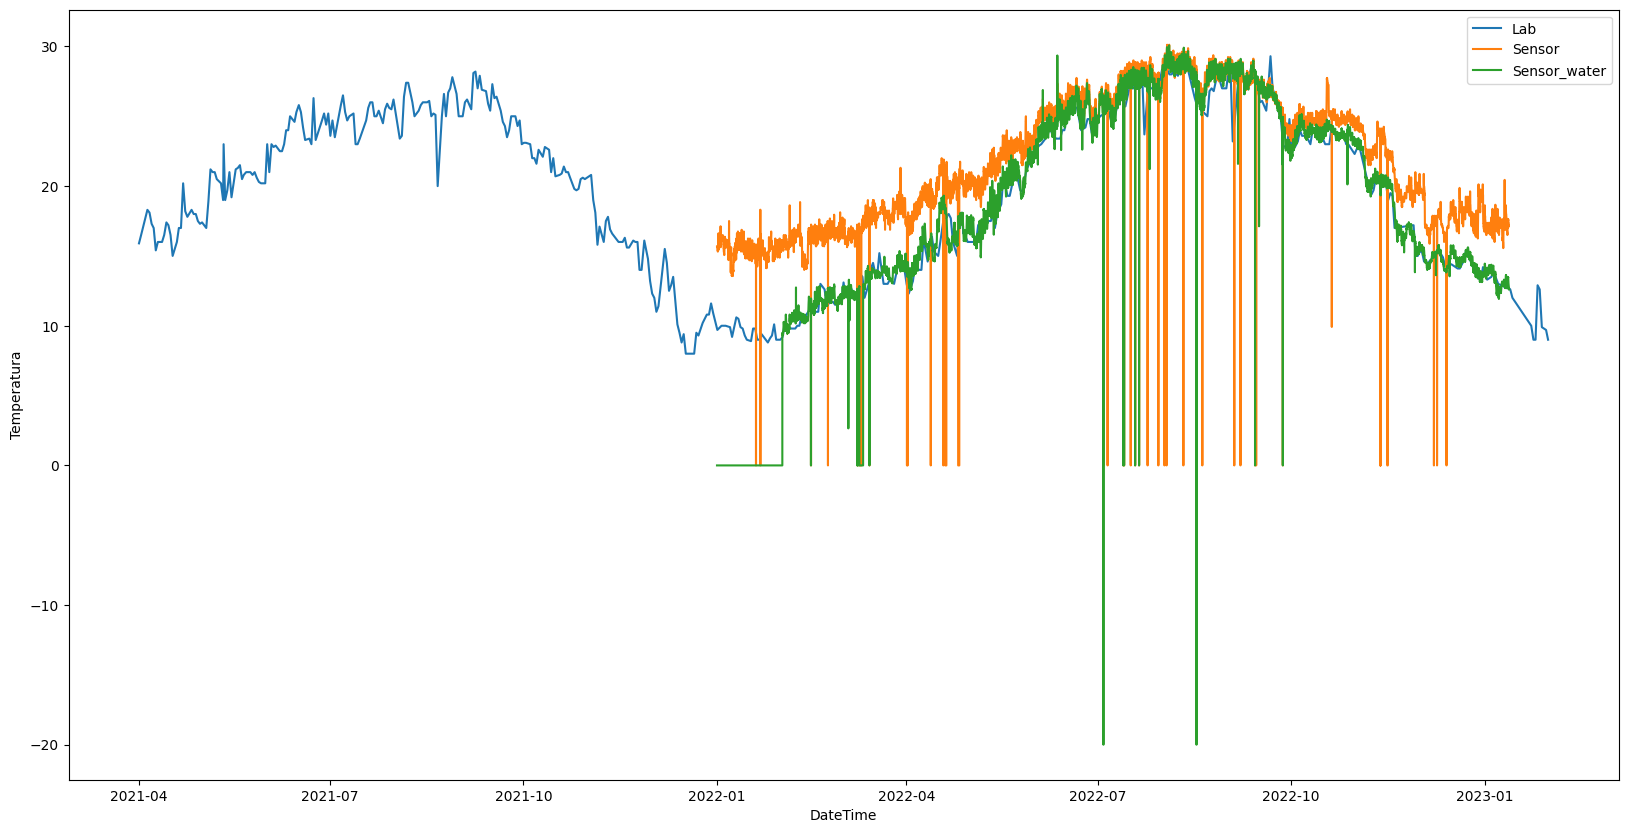

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

sns.lineplot(data=lab_temp_df, x="DateTime", y="Temperatura", label="Lab")
sns.lineplot(data=sensor_temp_df, x="DateTime", y="TEMP", label="Sensor")
sns.lineplot(
    data=sensor_temp_aigua_df,
    x="DateTime",
    y="TEMP_AIGUA",
    label="Sensor_water",
)

In [129]:
# drop TEMP from the sensor dataframe and keep only TEMP_AIGUA
eb0_sensor_df.drop(columns=["TEMP"], inplace=True)

In [130]:
eb0_sensor_df.to_excel(os.path.join(interm_data_path, "EB0_Sensor.xlsx"))

## EB1 online sensor readings

In [131]:
raw_eb1_sensor_df_dict = load_data_from_folder(eb1_sensor_path)

In [132]:
new_dict = {}
for key in deepcopy(raw_eb1_sensor_df_dict).keys():
    new_key = " ".join(key.split(" ")[:-1]).upper()
    new_dict[new_key] = deepcopy(raw_eb1_sensor_df_dict).pop(key)
raw_eb1_sensor_df_dict = new_dict

In [133]:
raw_eb1_sensor_df_dict.keys()

dict_keys(['PH', 'DOC', 'CONDUCTIVITAT', 'COLOR', 'TERBOLESA SCAN', 'ORP', 'UVA', 'TERBOLESA', 'ALARMA SPECTRAL', 'TLF', 'UVA SCAN', 'TEMPERATURA', 'TOC', 'CLOR LLIURE', 'PARTICULES'])

In [134]:
# remove SCAN variables from the dictionary since they are less reliable than the other sensors
raw_eb1_sensor_df_dict.pop("TERBOLESA SCAN")
raw_eb1_sensor_df_dict.pop("UVA SCAN")

,Fecha,Valor
0,2022-01-01 00:00:00,2.41
1,2022-01-01 00:10:00,2.41
2,2022-01-01 00:20:00,2.41
3,2022-01-01 00:30:00,2.41
4,2022-01-01 00:40:00,2.41
...,...,...
52555,2022-12-31 23:10:00,1.78
52556,2022-12-31 23:20:00,1.78
52557,2022-12-31 23:30:00,1.78
52558,2022-12-31 23:40:00,1.78


In [135]:
raw_eb1_sensor_df_dict["PH"]

,Fecha,HORA,PAB01_APH_M01_PV
0,04/03/2022,18:40:00,"7,5528"
1,04/03/2022,18:50:00,"7,55373"
2,04/03/2022,19:00:00,"7,55437"
3,04/03/2022,19:10:00,"7,55684"
4,04/03/2022,19:20:00,"7,55505"
...,...,...,...
51147,22/02/2023,23:10:00,"7,40668"
51148,22/02/2023,23:20:00,"7,40796"
51149,22/02/2023,23:30:00,"7,40885"
51150,22/02/2023,23:40:00,"7,40851"


In [136]:
eb1_sensor_df_dict = deepcopy(raw_eb1_sensor_df_dict)

In [137]:
for key, item in eb1_sensor_df_dict.items():
    item.dropna(inplace=True)
    item["Fecha"] = pd.to_datetime(
        item["Fecha"].astype(str).str.lstrip(),
        format="%d/%m/%Y",
        errors="coerce",
    ).dt.date

    # if HORA is in the column list
    if "HORA" in item.columns:
        item.drop(item[item["HORA"] == "0"].index, inplace=True)
        item["HORA"] = pd.to_datetime(item["HORA"], format="%H:%M:%S").dt.time

        item.insert(
            loc=0,
            column="DateTime",
            value=pd.to_datetime(
                item["Fecha"].astype(str) + " " + item["HORA"].astype(str)
            ),
        )
        item.drop(columns=["Fecha", "HORA"], inplace=True)
    else:
        item.insert(
            loc=0,
            column="DateTime",
            value=item["Fecha"],
        )
        item.drop(columns=["Fecha"], inplace=True)

    for col in item.columns[1:]:
        item[col] = item[col].replace("n/a", None, regex=True)
        item.dropna(inplace=True)
        item[col] = item[col].replace(",", ".", regex=True)
        item[col] = item[col].astype(float)

    eb1_sensor_df_dict[key] = item[
        (item["DateTime"] >= eb1_min_date) & (item["DateTime"] <= eb1_max_date)
    ]

In [138]:
# the column that contains the measured value is the first one containing _PV
# rename it with the name of the measured parameter
for key, item in eb1_sensor_df_dict.items():
    for col in item.columns:
        if "_PV" in col:
            item.rename(columns={col: key}, inplace=True)
            break

In [139]:
# a sample is considered valid if the columns after the one containing the measured value (the second one) are all equal to 0
# if not, the sample is considered invalid and is dropped
for key, item in eb1_sensor_df_dict.items():
    # Select the columns after the second one and check if all values are equal to 0
    mask = (item.iloc[:, 2:] != 0).any(axis=1)

    # Drop the rows where the mask is True
    item.drop(item[mask].index, inplace=True)

    # Drop the columns after the second one
    item.drop(columns=item.columns[2:], inplace=True)

In [140]:
# get the median sampling rate for each sensor to retrieve the most frequent sampling rate
sampling_rates = {}
for key, item in eb1_sensor_df_dict.items():
    sampling_rates[key] = item["DateTime"].diff().median()

# get the most frequent sampling rate
sampling_rate = max(
    set(sampling_rates.values()), key=list(sampling_rates.values()).count
)

# resample the dataframes to the most frequent sampling rate
for key, item in eb1_sensor_df_dict.items():
    item.set_index("DateTime", inplace=True)
    item = item[~item.index.duplicated(keep="first")]
    item = item.resample(sampling_rate).interpolate(method="time")
    item.reset_index(inplace=True)
    eb1_sensor_df_dict[key] = item

In [141]:
# Initialize the final DataFrame with the first DataFrame in the dictionary
eb1_sensor_df = next(iter(eb1_sensor_df_dict.values()))

# Merge the rest of the DataFrames
for key, df in list(eb1_sensor_df_dict.items())[1:]:
    eb1_sensor_df = eb1_sensor_df.merge(df, on="DateTime", how="outer")

# Sort the final DataFrame by 'DateTime'
eb1_sensor_df.sort_values("DateTime", inplace=True)

In [142]:
# Sort columns after DateTime by name
eb1_sensor_df = eb1_sensor_df.reindex(sorted(eb1_sensor_df.columns), axis=1)

# move DateTime to the first column
col = eb1_sensor_df.pop("DateTime")
eb1_sensor_df.insert(0, "DateTime", col)

In [143]:
eb1_sensor_df

,DateTime,ALARMA SPECTRAL,CLOR LLIURE,COLOR,CONDUCTIVITAT,DOC,ORP,PARTICULES,PH,TEMPERATURA,TERBOLESA,TLF,TOC,UVA
0,2020-03-03 01:10:00,NaN,0.82440,2.12500,840.0,NaN,NaN,NaN,NaN,13.81094,NaN,NaN,NaN,1.67
1,2020-03-03 01:20:00,NaN,0.87208,2.12500,840.0,NaN,NaN,NaN,NaN,13.81094,NaN,NaN,NaN,1.67
2,2020-03-03 01:30:00,NaN,0.95753,2.12500,840.0,NaN,NaN,NaN,NaN,13.81094,NaN,NaN,NaN,1.67
3,2020-03-03 01:40:00,NaN,0.94611,2.12500,840.0,NaN,NaN,NaN,NaN,13.81094,NaN,NaN,NaN,1.68
4,2020-03-03 01:50:00,NaN,0.95713,2.12500,840.0,NaN,NaN,NaN,NaN,13.81094,NaN,NaN,NaN,1.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153111,2023-01-30 07:40:00,4.87760,0.98852,0.62109,1520.0,NaN,608.0,630.77438,7.63589,11.37344,0.03050,4.05000,NaN,1.78
153112,2023-01-30 07:50:00,4.87500,0.98701,0.62109,1520.0,NaN,608.0,602.10281,7.63695,11.37344,0.03050,4.06250,NaN,1.78
153113,2023-01-30 08:00:00,4.90625,0.98575,0.62109,1520.0,NaN,608.0,607.73473,7.63576,11.37344,0.03250,4.06250,NaN,1.78
153114,2023-01-30 08:10:00,4.85000,0.98453,0.62109,1520.0,NaN,608.0,605.68676,7.63567,11.37344,0.02779,4.06771,NaN,1.78


In [144]:
eb1_sensor_df.to_excel(os.path.join(interm_data_path, "EB1_Sensor.xlsx"))

# THM measurements

In [145]:
# remove the last ";" from the last line of the file

with open(thm_measure_path, "r") as file:
    lines = file.readlines()

    corrected_lines = []
    line_iter = iter(lines)
    max_len = 0
    for line in line_iter:
        line = line.rstrip(";\n") + "\n"
        corrected_lines.append(line)

with open(thm_measure_path, "w") as file:
    file.writelines(corrected_lines)

In [146]:
raw_thm_measure_df = pd.read_csv(thm_measure_path, sep=";", na_filter=False)

In [147]:
raw_thm_measure_df

,Data,PM,Hora,TCM,DCBM,CDBM,TBM,TTHMs
0,21/07/2021,Arboç,9h00,5.50,13.30,21.20,9.40,49.40
1,05/10/2021,Arboç,9h15,5.60,16.20,27.80,16.20,65.80
2,19/10/2021,Arboç,9h05,4.10,13.00,27.20,16.10,60.40
3,09/11/2021,Arboç,8h52,1.25,9.20,21.80,15.80,46.80
4,01/12/2021,Arboç,8h40,0.00,8.30,22.50,17.50,48.30
5,01/02/2022,Arboç,9h00,2.97,6.07,10.53,3.99,23.56
6,15/02/2022,Arboç,8h40,5.17,8.50,12.26,2.49,28.41
7,01/03/2022,Arboç,8h30,3.69,7.36,12.24,3.41,26.71
8,15/03/2022,Arboç,8h30,3.39,7.37,12.75,4.08,27.59
9,29/03/2022,Arboç,8h45,3.73,8.33,15.93,6.13,34.12


In [148]:
thm_measure_df = deepcopy(raw_thm_measure_df)

In [149]:
thm_measure_df["Data"] = pd.to_datetime(
    thm_measure_df["Data"], format="%d/%m/%Y"
).dt.date


thm_measure_df["Hora"] = pd.to_datetime(
    thm_measure_df["Hora"], format="%Hh%M"
).dt.time

In [150]:
thm_measure_df[["TCM", "DCBM", "CDBM", "TBM", "TTHMs"]] = thm_measure_df[
    ["TCM", "DCBM", "CDBM", "TBM", "TTHMs"]
].astype(float)

In [151]:
thm_measure_df.drop(columns=["PM"], inplace=True)

In [152]:
# union of the date and time columns
thm_measure_df.insert(
    loc=0,
    column="DateTime",
    value=pd.to_datetime(
        thm_measure_df["Data"].astype(str)
        + " "
        + thm_measure_df["Hora"].astype(str)
    ),
)

In [153]:
thm_measure_df.drop(columns=["Data", "Hora"], inplace=True)

In [154]:
thm_measure_df

,DateTime,TCM,DCBM,CDBM,TBM,TTHMs
0,2021-07-21 09:00:00,5.50,13.30,21.20,9.40,49.40
1,2021-10-05 09:15:00,5.60,16.20,27.80,16.20,65.80
2,2021-10-19 09:05:00,4.10,13.00,27.20,16.10,60.40
3,2021-11-09 08:52:00,1.25,9.20,21.80,15.80,46.80
4,2021-12-01 08:40:00,0.00,8.30,22.50,17.50,48.30
5,2022-02-01 09:00:00,2.97,6.07,10.53,3.99,23.56
6,2022-02-15 08:40:00,5.17,8.50,12.26,2.49,28.41
7,2022-03-01 08:30:00,3.69,7.36,12.24,3.41,26.71
8,2022-03-15 08:30:00,3.39,7.37,12.75,4.08,27.59
9,2022-03-29 08:45:00,3.73,8.33,15.93,6.13,34.12


In [155]:
thm_measure_df.to_excel(os.path.join(interm_data_path, "THMs.xlsx"))